In [192]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.random.seed(100)

In [2]:
#load the data_set into the dataframe
pima_df=pd.read_csv("F:\Syed Issam Bukhari\Diabetes-Detection\Data\Raw_Data\diabetes.csv")


In [3]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Adding null values to the dataset

In [5]:
pima_df_with_null = pima_df.mask(np.random.random(pima_df.shape) < .1)

In [8]:
pima_df_with_null.isna().sum()

Pregnancies                 77
Glucose                     81
BloodPressure               82
SkinThickness               87
Insulin                     75
BMI                         72
DiabetesPedigreeFunction    79
Age                         75
Outcome                     92
dtype: int64

In [16]:
pima_df_with_null_deleted=pima_df_with_null.dropna(axis=0)

In [17]:
pima_df_with_null_deleted.shape


(282, 9)

In [21]:
pima_df_with_null_deleted.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0,0.0
10,4.0,110.0,92.0,0.0,0.0,37.6,0.191,30.0,0.0
11,10.0,168.0,74.0,0.0,0.0,38.0,0.537,34.0,1.0


In [110]:
#percentage of the data lost

#Number of the cells for deleted df
Number_after_delt=pima_df_with_null_deleted.size

#Number of the cells for non deleted df
Number_before_delt=pima_df_with_null.size

#percentage of the cells remaining 
Percentage=(Number_after_delt/Number_before_delt)*100

print(Percentage)


36.71875


## Only 36 percent is left so deleting is not a good idea

In [111]:
#Replace all the null values with median
pima_df_with_null_median=pima_df_with_null.fillna(value=pima_df_with_null.median())


In [114]:
pima_df_with_null_median.describe()
pima_df_with_null_median['Pregnancies']=pima_df_with_null_median['Pregnancies'].astype('int')

In [122]:
pima_df_with_null_median.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.811198,120.026042,69.207031,20.984375,77.149740,32.149219,0.452849,32.873698,0.304688
std,3.199500,30.432550,18.775073,15.149572,111.020863,7.413473,0.311012,11.266405,0.460575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.775000,0.254000,24.000000,0.000000
50%,3.000000,116.000000,72.000000,23.000000,37.000000,32.250000,0.362000,29.000000,0.000000
75%,6.000000,136.000000,78.000000,32.000000,120.000000,35.925000,0.583000,39.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Permorming exploratory data analysis

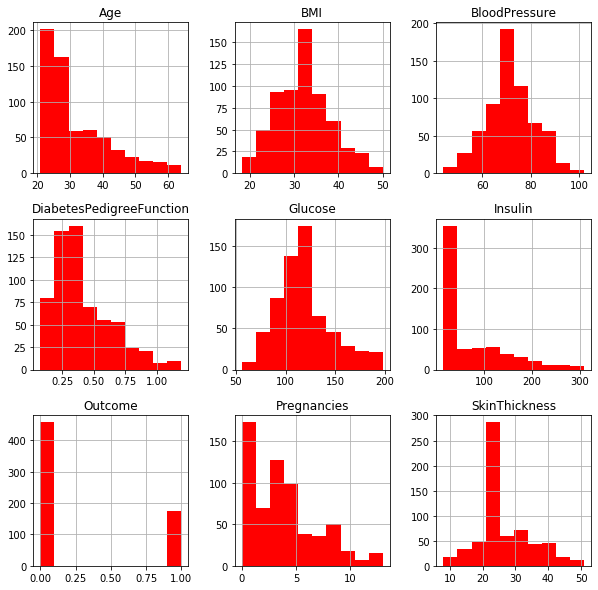

In [278]:
pima_df_with_null_median.hist(figsize=[10,10],color='red');

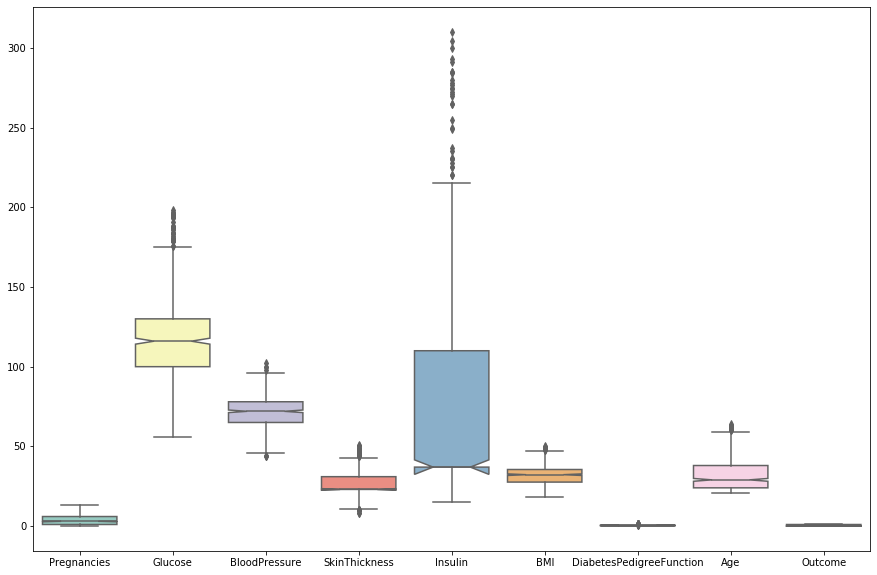

In [279]:
plt.figure(figsize=(15,10))
sns.boxplot(data=pima_df_with_null_median,notch=True,palette="Set3")

# There are some outliers in all the columns and I am removing only 0 values from the data. Retaining other outliers.

In [196]:
pima_df_with_null_median.median()

Pregnancies                   3.000
Glucose                     116.000
BloodPressure                72.000
SkinThickness                23.000
Insulin                      37.000
BMI                          32.250
DiabetesPedigreeFunction      0.362
Age                          29.000
Outcome                       0.000
dtype: float64

In [81]:
#Glucose
pima_df_with_null_median.loc[pima_df_with_null_median['Glucose']==0].shape[0]

5

In [82]:
#BloodPressure
pima_df_with_null_median.loc[pima_df_with_null_median['BloodPressure']==0].shape[0]

34

In [83]:
#SkinThickness
pima_df_with_null_median.loc[pima_df_with_null_median['SkinThickness']==0].shape[0]

200

In [84]:
#Insulin
pima_df_with_null_median.loc[pima_df_with_null_median['Insulin']==0].shape[0]

331

In [85]:
#DiabetesPedigreeFunction
pima_df_with_null_median.loc[pima_df_with_null_median['DiabetesPedigreeFunction']==0].shape[0]

0

In [86]:
#Age
pima_df_with_null_median.loc[pima_df_with_null_median['DiabetesPedigreeFunction']==0].shape[0]

0

## Glucose-5, bloodpressure-34 , skinthickness-200,insulin-331 (have 0 values which is not relevant)

In [150]:
#we can drop glucose rows
index=pima_df_with_null_median.loc[pima_df_with_null_median['Glucose']==0].index
pima_df_with_null_median.drop(index=index,inplace=True,axis=0)


In [152]:
#we can drop bloodpressure rows
index=pima_df_with_null_median.loc[pima_df_with_null_median['BloodPressure']==0].index
pima_df_with_null_median.drop(index=index,inplace=True,axis=0)

In [155]:
# we will fill the insulin and skin thickness with medians
pima_df_with_null_median['Insulin'].replace(0,pima_df_with_null_median['Insulin'].median(),inplace=True)

pima_df_with_null_median['SkinThickness'].replace(0,pima_df_with_null_median['SkinThickness'].median(),inplace=True)


In [267]:
pima_df_with_null_median.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [271]:
# pima_df_with_null_median_input=pima_df_with_null_median.loc[:,pima_df_with_null_median.columns!='Outcome']
# # #Eliminating the outliers
# q_high = pima_df_with_null_median_input.quantile(0.99)
# q_low=pima_df_with_null_median_input.quantile(0.01)


Pregnancies                  13.00000
Glucose                     262.68000
BloodPressure               143.36000
SkinThickness                58.32000
Insulin                     314.64000
BMI                          67.08000
DiabetesPedigreeFunction      1.19268
Age                          83.00000
dtype: float64


In [260]:
# pima_df_with_null_median_filtered=pima_df_with_null_median[(pima_df_with_null_median<q_high)&(pima_df_with_null_median>q_low)]

In [270]:
# pima_df_with_null_median_filtered.isnull().sum()

Pregnancies                  80
Glucose                      16
BloodPressure                15
SkinThickness                15
Insulin                      14
BMI                          14
DiabetesPedigreeFunction     14
Age                          52
Outcome                     633
dtype: int64

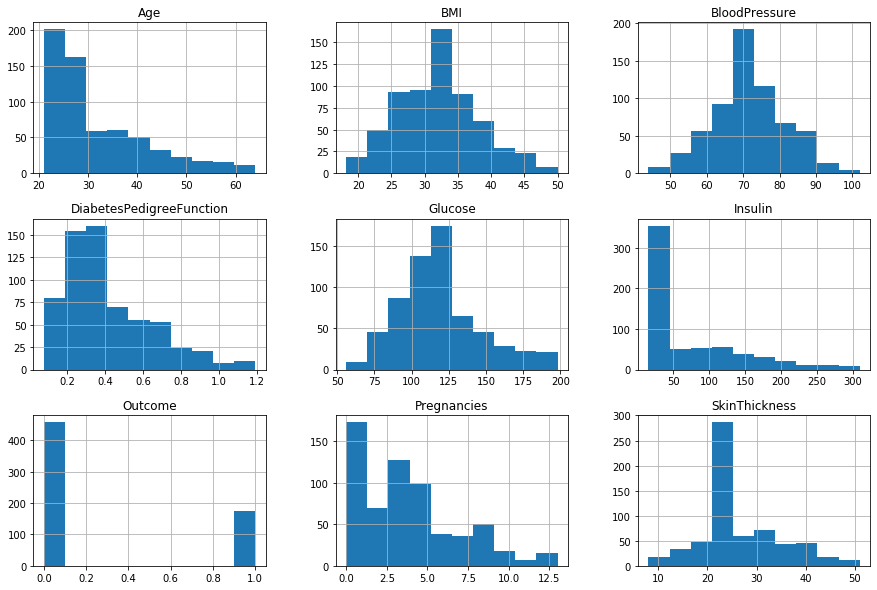

In [280]:
pima_df_with_null_median.hist(figsize=(15,10));

# # In this notebook we have successfully handled missing values , insignificant values and outliers using imputation and elimination technique.

In [281]:
pima_df_with_null_median.to_csv("F:\Syed Issam Bukhari\Diabetes Detection\Data\Processed_Data\diabetes.csv")

In [283]:
pima_df_with_null_median.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 633 non-null int64
Glucose                     633 non-null float64
BloodPressure               633 non-null float64
SkinThickness               633 non-null float64
Insulin                     633 non-null float64
BMI                         633 non-null float64
DiabetesPedigreeFunction    633 non-null float64
Age                         633 non-null float64
Outcome                     633 non-null float64
dtypes: float64(8), int64(1)
memory usage: 49.5 KB


Pregnancies                  80
Glucose                      16
BloodPressure                15
SkinThickness                15
Insulin                      14
BMI                          14
DiabetesPedigreeFunction     14
Age                          52
Outcome                     633
dtype: int64